# Data trends and regression models

In the last section we saw how we can perform initial data exploration effectively. We used visualisation techniques to help us uncover relationships, correlations and trends. In this section we will take things a step further and look at how we can use data to build models that formalise our understanding of those correlations and trends. 

When we talk about using computers to extract information from data, automatically learning and improving through the use of that data, we are really talking about _machine learning_. Machine learning is a broad term that applies to a wide range of methods, and one of the simplest techniques is one that you've worked with before: the linear fit, or linear _regression_. 

In this activity we're going to work through a linear regression exercise. We will be using [scikit-learn](https://scikit-learn.org/stable/), a machine learning library for python, and we will set up the regression model following the steps one would usually take when preparing a predictive model. 

This will involve the following steps:

1. **Input** and **prepare** your data.
    - Often our data will need to be cleaned, reshaped, transformed or scaled so that it is in a suitable format for our model. 
2. **Import** the model from scikit-learn that we want to use. 
    - In this case this will be the `LinearRegression()` model.
3. **Create an instance** of that model that you can use for your routine.
    - At this time you should set any _hyperparameters_ that you might need to. 
4. **Fit** the model to the data from which you want your model to learn. 
    - This is the step in which the model will calculate the model parameters, based on what is learned from the data.
5. Use the model to **predict** new information.


## Input data

We're going to start with an example dataset, which is being read in below. If we print some summary information about this dataset, we can see that there are two columns: $x$ and $y$. 

Can you see how many non-null entries there are in each column from the below?

In [1]:
import pandas as pd
%matplotlib inline

# load the data
data = pd.read_csv("data/line_to_fit_1.csv")

# print summary information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


We can also see that $x$ and $y$ have a high linear correlation:

In [2]:
# print correlation information
print(f"The correlation between x and y is {data.corr()['x']['y']}")

The correlation between x and y is 0.9881582860812733


If we plot the data we can see a relationship between $x$ and $y$: 

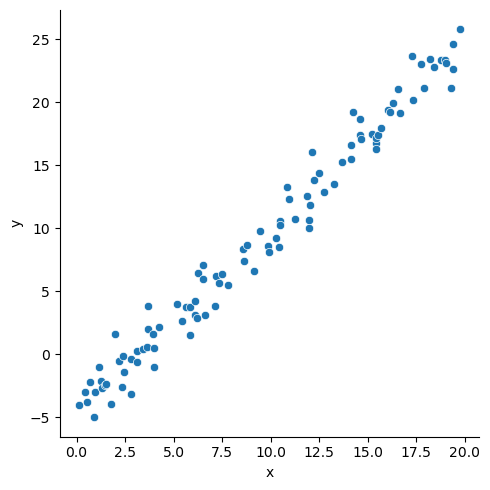

In [3]:
import seaborn as sns

# plot the two columns from the data
sns.relplot(data=data,x="x",y="y")

## Setting up a regression model

Let's suppose we want to be able to predict the value of $y$, based on the known values of $x$. In that case, $x$ is our _independent_ variable, and $y$ in our _dependent_ variable, and we will be modelling the dependence of $y$ on $x$. In machine learning nomenclature the independent variable, $x$, is referred to as a _feature_; a set of values that are measured or otherwise known and are used as inputs to a machine learning model.

Based on the high linear correlation, and the scatter plot that we can evaluate visually, it looks as though we ought to be able to represent the relationship between the two variables in this dataset with a straight line. Therefore, we're going to use `LinearRegression()` from scikit-learn.

Note that `LinearRegression()` is a class, with several associated methods. We'll look at a few of those methods later, but for now we need to create an instance of the `LinearRegression()` class, which represents our model.


If you look at the `LinearRegression()` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), you will notice a `fit_intercept` argument. This is an example of a _hyperparameter_, a parameter that we fix during model setup. Hyperparameters are not computed by the model, but chosen during construction. 

#### Exercise 1
From the documentation page linked above, take a look at what the `fit_intercept` argument does and decide what you think it should be set to based on the information you have about the data we're modelling. When you have made a decision, you can replace the `????` in the cell below to reflect your choice and run the cell to instantiate your model.

In [5]:
# import the relevant model from sklearn
from sklearn import linear_model

# create an instance of the model
model = linear_model.LinearRegression(fit_intercept=True)

## Fitting (training) our model
To fit our model to some data we need to use the `fit()` method. 

If you look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) of this method, you'll see that it accepts two compulsory input parameters:
- _Training data_ **X** of shape $(n_{\mathrm{samples}},n_{\mathrm{features}})$
- _Target values_  **Y** of shape $(n_{\mathrm{samples}})$

At this point it is helpful to note a couple of things:
1. Here, the _training data_ is a two-dimensional object, with dimensions $(n_{\mathrm{samples}},n_{\mathrm{features}})$.
    - In our case we have 100 samples, but only one feature: $x$. We therfore need to represent $x$ such that it has shape $(100,1)$.
    - Essentially, in our case, we want to represent $x$ as a _DataFrame_.
2. When we fit our model we are asking it to learn how to infer the _target values_ based on the _training data_.

Below, we're going to prepare the data so that they are in a suitable format for the model.

In [6]:
# Create a single column DataFrame for training data x
X = data[['x']]

# Extract y data series
Y = data["y"]


Note that, when using pandas, specifying a column name within single square brackets `[]` will return a pandas _series_, while using double square brackets `[[]]` will return a DataFrame. You can select multiple columns from an existing DataFrame to create a new DataFrame using this notation. For example: `X = data[['x','y']]` would create a new DataFrame with the two columns, `x` and `y`, from the original DataFrame.

You can convince yourself that:
- $X$ is a DataFrame and $Y$ is a series 
- The shapes of $X$ and $Y$ are as you would expect based on the description of training data and target variables above.

In [7]:
print(f"X is of type {type(X)} with shape {X.shape}")
print(f"Y is of type {type(Y)} with shape {Y.shape}")

X is of type <class 'pandas.core.frame.DataFrame'> with shape (100, 1)
Y is of type <class 'pandas.core.series.Series'> with shape (100,)


We can now pass $X$ and $Y$ to the `fit()` method to _train_ our model.

In [8]:
# Pass the data to the `fit` method
model.fit(X,Y)

LinearRegression()

It is at this point that the optimal model parameters are computed. Once this `fit` process is complete the model has identified the most performant parameters to predict the value of $y$ based on the value of $x$.

## Making predictions

Now that we have trained our model, we can use it to make predictions. That is, we can supply some $x$-values to the model and ask it to infer (or _predict_) the associated $y$-values. We do this using the `predict()` method.

Notice that, at the moment, we are using the same $x$ values when _training_ our model (using `fit()`) and testing the model (using `predict()`). 


In [9]:
data["pred_y"] = model.predict(X)

## Extracting model parameters
When visiting fitting a line during your introductory scientific computing course, you learned how to extract fit parameters when using `np.polyfit()`.

#### Exercise 2
Take a look at the _Attributes_ listed in the `LinearRegression()` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and see if you can edit the code block below (replacing the `????`)to print out the coefficient and intercept from the linear regression.

In [10]:
print("Line gradient from model: ", model.coef_)
print("Line intercept from model:", model.intercept_)

Line gradient from model:  [1.46551701]
Line intercept from model: -4.67735576367987


## Visualising model results
We can overlay the results of the linear model on a scatter plot of the true $x$ and $y$ values.

Text(0, 0.5, 'y')

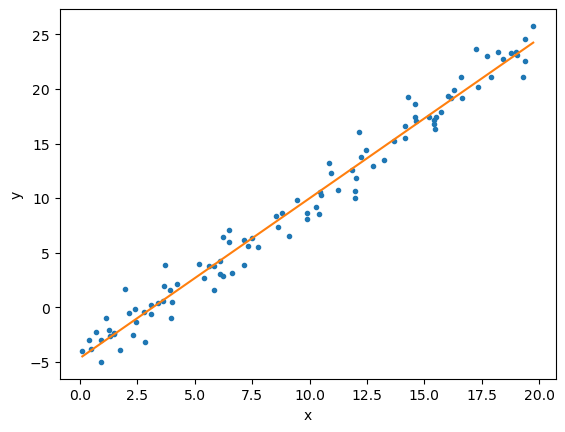

In [11]:
import matplotlib.pyplot as plt

fig, ax  = plt.subplots()

# Create a scatter plot of the known x-y values
ax.plot(data["x"],data["y"],'.')

# Draw a line to represent the predicted y-values
ax.plot(data["x"],data["pred_y"])

# Axis labels to be tidy
ax.set_xlabel("x")
ax.set_ylabel("y")


Where possible, a visual check is always useful to get an idea of our model's performance. From the above plot, does it look as though this model does a reasonable job at approximating the data? 

Another visual check can be made by plotting the _residuals_; the difference between the true (or observed) value of $y$ and the predicted value of $y$.

#### Exercise 3
Edit the code block below to plot the residuals as a function of the independent variable $x$.

_Tip: to guide the eye when making residuals plots, it can help to use `plt.axhline(0, linestyle='dashed')` to draw a horizontal line at 0 on the y=axis._


Text(0, 0.5, 'Residuals')

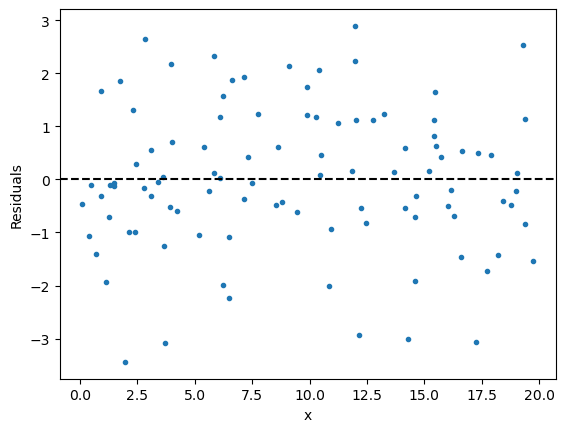

In [15]:
fig, ax  = plt.subplots()

# Create a plot of residuals
ax.plot(data["x"], data["pred_y"] - data["y"],'.')

# Add a horizontal line at zero to guide the eye
ax.axhline(0, color='k', linestyle='dashed')

# Add axis labels
ax.set_xlabel("x")
ax.set_ylabel("Residuals")

The above should show a reasonably symmetrical distribution of residuals about zero. This indicates that our regression model captured the trend in the data. The residuals are relatively evenly distributed over the full range of values of the independent variable $x$, indicating homoscedasticity.


Residuals plots are very useful to help determine whether a particular regression model is appropriate for your data. 

The `seaborn` package offers a method to perform a quick regression and visualise the resulting residuals. This is a helpful first check before you embark on your model setup using scikit-learn. If the residuals plot looks reasonable it would give us confidence in moving forward with a linear regression model.

To see the seaborn residuals plot for this data run the cell below:

<Axes: xlabel='x', ylabel='y'>

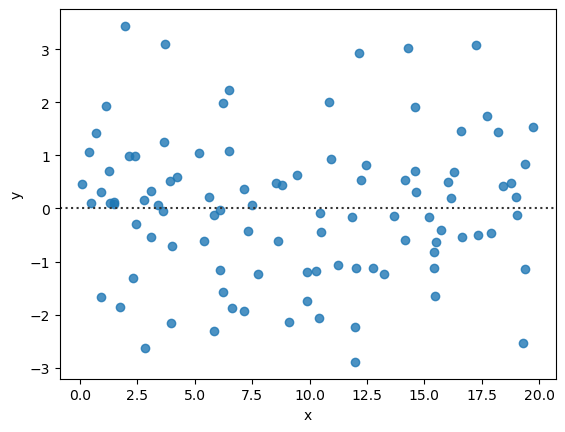

In [16]:
sns.residplot(data=data,x="x",y="y")

We'll talk more about model validation in our next workshop.

## Group Activity

#### Activity 1 
Run the cell below to read in a new dataset. Check what it looks like (e.g. using `info()` and then `relplot`) and have a go at making a residuals plot using the above seaborn `residplot` method for this data. 

Consider the following:

- Does it look as though a first order linear regression would be appropriate for this data?
- What order polynomial do you think might work?
    - _Hint: you could try playing with the `order` argument in the `residplot` method._


In [17]:
# read in data file
new_data = pd.read_csv("data/line_to_fit_2.csv")

In [19]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


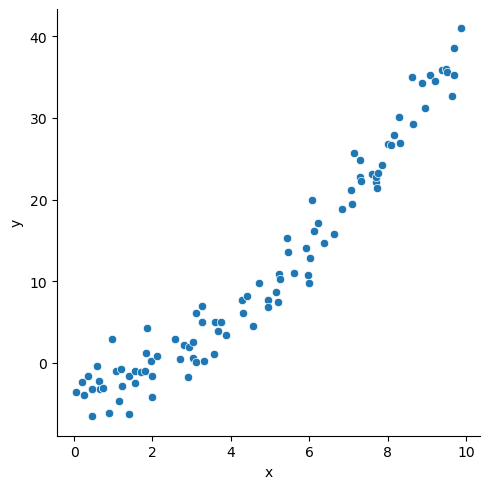

In [20]:
sns.relplot(data=new_data,x="x",y="y")

<Axes: xlabel='x', ylabel='y'>

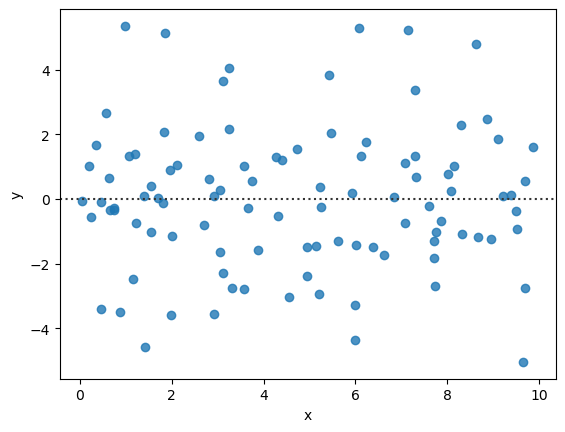

In [21]:
sns.residplot(data=new_data,x="x",y="y",order=2)

#### Activity 2

Try to set up a regression model for this data using scikit-learn. 

You will need to _preprocess_ the data prior to training the regression model using the scikit-learn [`PolynomialFeatures` method](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to fit and transform the training input data `x`. 

This should produce a transformed input for your linear regression model containing three features: [1., $x$, $x^{2}$]. This problem can be broken down into the following steps:
- Create your training inputs for your model.
- Import the `PolynomialFeatures` class from `sklearn.preprocessing`.
- Instantiate a `PolynomialFeatures` object.
- Fit and transform your training data.
- Use this transformed training data to train a linear regression model.
- Visualise your model results by plotting your model predictions as a function of your untransformed training data.

In [25]:
from sklearn.preprocessing import PolynomialFeatures
# read in data file
new_data = pd.read_csv("data/line_to_fit_2.csv")
new_model = PolynomialFeatures()
X = new_data[["x"]]
Y = new_data["y"]
new_model.fit(X,Y)

PolynomialFeatures()

In [49]:
function_y = pd.DataFrame(new_model.transform(X))
pred_y = function_y[[0]] + function_y[[1]] * X + function_y[[2]] * X ** 2
pred_y

,0,1,2,x
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
95,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN


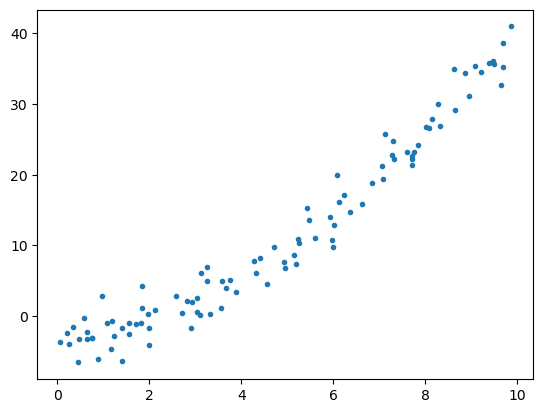

In [36]:
fig, ax = plt.subplots()
ax.plot(new_data["x"],new_data["y"],".")